In [75]:
import requests
import datetime as dt
import sqlite3
import json
import time
import numpy as np
import pandas as pd
import pylab as plt

In [2]:
complete_subs = ['superstonks', 'finance', 'options', 'pennystocks', 'stocks']

In [4]:
conn = sqlite3.connect('redditPosts.sqlite')
c = conn.cursor()

In [12]:
cmd = 'SELECT * FROM Posts P JOIN PostBodyAndScore B ON P.id = B.id'
df = pd.read_sql(sql=cmd, con=conn)

In [13]:
df.head(2)

,id,subreddit,title,author,url,created,ext_link,id,body,score,upvote_ratio
0,koaw8g,finance,Tech's top seven companies added $3.4 trillion...,Obrocheetah,https://www.reddit.com/r/finance/comments/koaw...,1609505868,None,koaw8g,[deleted],1,1.0
1,kobbka,finance,Mogo: Establishes ATM Equity Program Mogo a fi...,fintechinshorts,https://www.reddit.com/r/finance/comments/kobb...,1609507913,https://www.fintechinshorts.com/mogo-establish...,kobbka,,1,1.0


## See how is the distribution of counts

In [14]:
print ("Shape:", df.shape)

Shape: (76141, 11)


In [28]:
df.groupby("subreddit").count()

,id,title,author,url,created,ext_link,id,body,score,upvote_ratio
subreddit,,,,,,,,,,
GME,7951,7951,7951,7951,7951,7951,7951,7951,7951,7951
Superstonks,146,146,146,146,146,146,146,146,146,146
finance,2941,2941,2941,2941,2941,2940,2941,2941,2941,2941
options,16589,16589,16589,16589,16589,16588,16589,16589,16589,16589
pennystocks,48514,48514,48514,48514,48514,48507,48514,48514,48514,48514


In [34]:
df.groupby("subreddit").count().index.values

array(['GME', 'Superstonks', 'finance', 'options', 'pennystocks'],
      dtype=object)

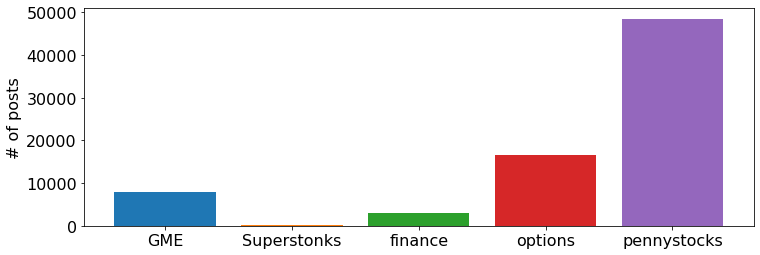

In [41]:
plt.figure(figsize=(12,4))
plt.bar(df.groupby("subreddit").count().index.values,
        df.groupby("subreddit").count().values[:,0], 
        color=['C0', 'C1', 'C2', 'C3', 'C4']
       )
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.ylabel("# of posts",fontsize=16);

In [42]:
df.head(2)

,id,subreddit,title,author,url,created,ext_link,id,body,score,upvote_ratio
0,koaw8g,finance,Tech's top seven companies added $3.4 trillion...,Obrocheetah,https://www.reddit.com/r/finance/comments/koaw...,1609505868,None,koaw8g,[deleted],1,1.0
1,kobbka,finance,Mogo: Establishes ATM Equity Program Mogo a fi...,fintechinshorts,https://www.reddit.com/r/finance/comments/kobb...,1609507913,https://www.fintechinshorts.com/mogo-establish...,kobbka,,1,1.0


In [43]:
df.describe()

,created,score,upvote_ratio
count,7.614100e+04,76141.000000,76141.000000
mean,1.613587e+09,24.991595,0.916429
std,2.621718e+06,356.623452,0.162318
min,1.609481e+09,0.000000,0.050000
25%,1.611866e+09,1.000000,0.900000
50%,1.612889e+09,1.000000,1.000000
75%,1.614727e+09,4.000000,1.000000
max,1.620662e+09,31079.000000,1.000000


In [46]:
df.upvote_ratio.unique()

array([1.  , 0.4 , 0.96, 0.7 , 0.91, 0.5 , 0.11, 0.61, 0.13, 0.84, 0.93,
       0.74, 0.77, 0.72, 0.95, 0.98, 0.97, 0.85, 0.64, 0.63, 0.83, 0.88,
       0.67, 0.78, 0.6 , 0.57, 0.89, 0.32, 0.33, 0.71, 0.75, 0.8 , 0.79,
       0.59, 0.58, 0.14, 0.81, 0.86, 0.69, 0.62, 0.92, 0.36, 0.94, 0.29,
       0.25, 0.65, 0.76, 0.73, 0.22, 0.38, 0.24, 0.55, 0.46, 0.66, 0.52,
       0.43, 0.87, 0.44, 0.54, 0.82, 0.99, 0.68, 0.9 , 0.27, 0.45, 0.48,
       0.56, 0.49, 0.2 , 0.3 , 0.17, 0.26, 0.1 , 0.53, 0.42, 0.15, 0.47,
       0.35, 0.19, 0.31, 0.18, 0.09, 0.23, 0.41, 0.39, 0.21, 0.08, 0.28,
       0.37, 0.06, 0.12, 0.07, 0.34, 0.51, 0.05, 0.16])

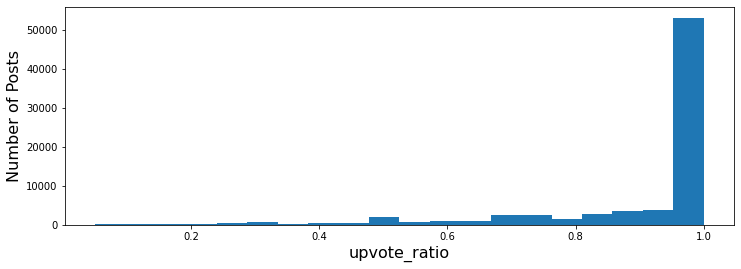

In [70]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.hist(df.upvote_ratio, bins=20);
ax.set_xlabel('upvote_ratio', fontsize=16);
ax.set_ylabel('Number of Posts', fontsize=16);

In [118]:
subs = ['GME', 'Superstonks', 'finance', 'options', 'pennystocks']
for i, sub in enumerate(subs):
    df_sub = df_sorted[df.subreddit==sub]
    print (sub, len(df_sub.upvote_ratio.values))

GME 2880
Superstonks 25
finance 8
options 6066
pennystocks 7971


/Users/gshyam/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


/Users/gshyam/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


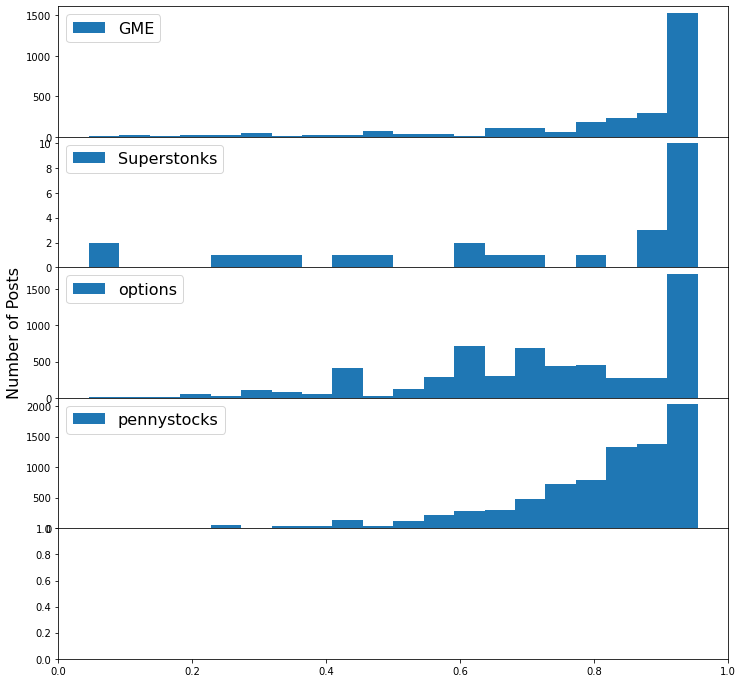

In [157]:
fig, ax = plt.subplots(5,1, figsize=(12, 12))
for i, sub in enumerate(subs):
    df_sub = df_sorted[df.subreddit==sub]
    ax[i].hist(df_sub.upvote_ratio, bins=20, label=sub);
    ax[i].set_xlabel('upvote_ratio', fontsize=16);
    ax[i].legend(fontsize=16)
    plt.subplots_adjust(hspace=0)
ax[2].set_ylabel('Number of Posts', fontsize=16);


In [127]:
df_with_body = df[ (df.body != '[deleted]') & (df.body != '[removed]') & (df.body != '')   ]
df_with_body.head(2)

,id,subreddit,title,author,url,created,ext_link,id,body,score,upvote_ratio
97,ko6pbd,options,$STX $69 call dropped from .60 premium to .01 ...,Faizen22,https://www.reddit.com/r/options/comments/ko6p...,1609482915,None,ko6pbd,This morning I created a new scanner that aler...,35,0.85
103,koaa9c,options,SPY 380/379 Dec 31 Bear Call Spread Trading at...,casserolejoe9599,https://www.reddit.com/r/options/comments/koaa...,1609502828,https://www.reddit.com/r/options/comments/koaa...,koaa9c,I had a Bear Call Spread 380/379 that was expi...,2,0.63


In [128]:
df_with_body['body_len'] = df_with_body['body'].apply(len)

/Users/gshyam/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [129]:
df_with_body.head(2)

,id,subreddit,title,author,url,created,ext_link,id,body,score,upvote_ratio,body_len
97,ko6pbd,options,$STX $69 call dropped from .60 premium to .01 ...,Faizen22,https://www.reddit.com/r/options/comments/ko6p...,1609482915,None,ko6pbd,This morning I created a new scanner that aler...,35,0.85,577
103,koaa9c,options,SPY 380/379 Dec 31 Bear Call Spread Trading at...,casserolejoe9599,https://www.reddit.com/r/options/comments/koaa...,1609502828,https://www.reddit.com/r/options/comments/koaa...,koaa9c,I had a Bear Call Spread 380/379 that was expi...,2,0.63,323


In [130]:
np.histogram(df_with_body.body_len, bins=20)

(array([14622,  1260,   499,   226,   118,    84,    45,    31,    20,
           17,    11,     3,     4,     1,     2,     2,     1,     1,
            1,     2]),
 array([1.000000e+00, 1.821350e+03, 3.641700e+03, 5.462050e+03,
        7.282400e+03, 9.102750e+03, 1.092310e+04, 1.274345e+04,
        1.456380e+04, 1.638415e+04, 1.820450e+04, 2.002485e+04,
        2.184520e+04, 2.366555e+04, 2.548590e+04, 2.730625e+04,
        2.912660e+04, 3.094695e+04, 3.276730e+04, 3.458765e+04,
        3.640800e+04]))

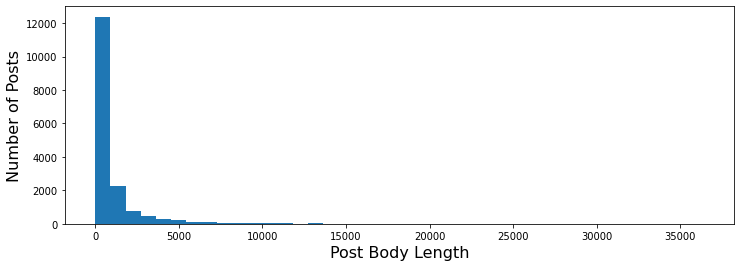

In [131]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.hist(df_with_body.body_len, bins=40);
ax.set_xlabel('Post Body Length', fontsize=16);
ax.set_ylabel('Number of Posts', fontsize=16);

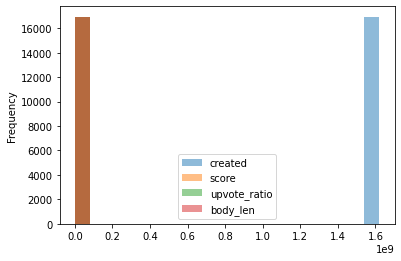

In [85]:
#ax = df.plot.hist(bins=12, alpha=0.5)
df_with_body.plot.hist(by=['upvote_ratio','body_len'], bins=20, alpha=0.5);

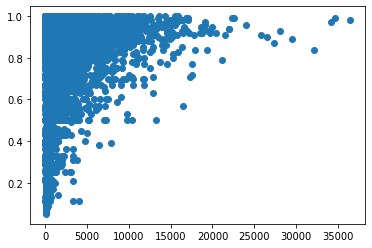

In [132]:
plt.plot(df_with_body['body_len'], df_with_body['upvote_ratio'],  'o');

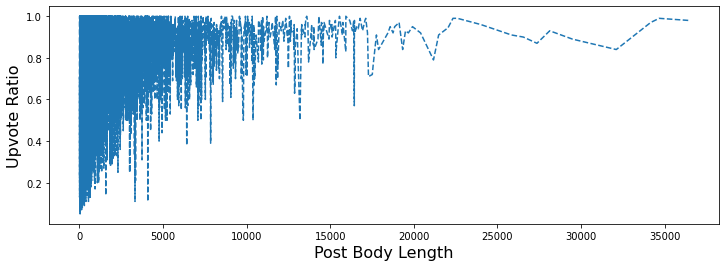

In [133]:
df_sorted = df_with_body.sort_values(by='body_len', ascending=False)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(df_sorted['body_len'], df_sorted['upvote_ratio'],  '--');
ax.set_xlabel('Post Body Length', fontsize=16);
ax.set_ylabel('Upvote Ratio', fontsize=16);


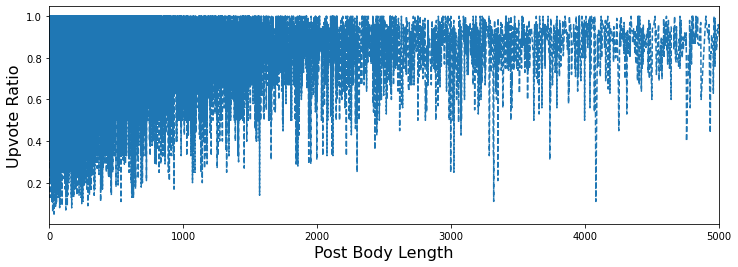

In [134]:
df_sorted = df_with_body.sort_values(by='body_len', ascending=False)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(df_sorted['body_len'], df_sorted['upvote_ratio'],  '--');
ax.set_xlabel('Post Body Length', fontsize=16);
ax.set_ylabel('Upvote Ratio', fontsize=16);
ax.set_xlim([0, 5000]);

In [135]:
(df_with_body.body_len=='nan').sum()

0

In [140]:
df_sorted = df_with_body.sort_values(by='body_len', ascending=False)

for i, sub in enumerate(subs):
    df_sub = df_sorted[df_sorted.subreddit==sub]
    print ( len(df_sub['body_len']))
    #ax[i].plot(df_sub['body_len'], df_sub['upvote_ratio'],  ls='--', label=sub);
    #ax[i].set_xlabel('Post Body Length', fontsize=16);
    #ax[i].set_ylabel('Upvote Ratio', fontsize=16);
    #ax[i].legend()
    #ax[i].set_xlim([0, 5000]);
    

2880
25
8
6066
7971


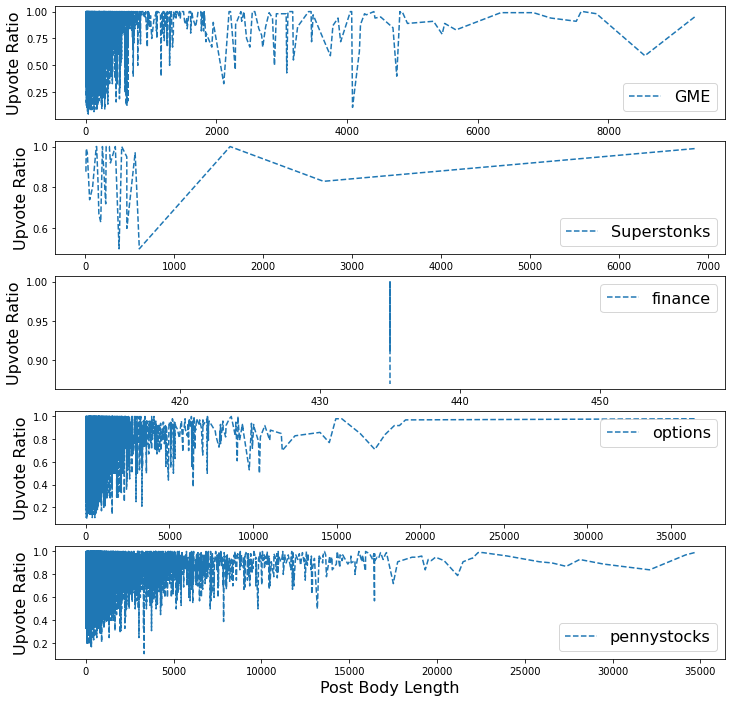

In [141]:
df_sorted = df_with_body.sort_values(by='body_len', ascending=False)

fig, ax = plt.subplots(5,1, figsize=(12, 12))

for i, sub in enumerate(subs):
    df_sub = df_sorted[df_sorted.subreddit==sub]
    ax[i].plot(df_sub['body_len'], df_sub['upvote_ratio'],  ls='--', label=sub);
    ax[i].set_xlabel('Post Body Length', fontsize=16);
    ax[i].set_ylabel('Upvote Ratio', fontsize=16);
    ax[i].legend(fontsize=16)
    #ax[i].set_xlim([0, 5000]);
    

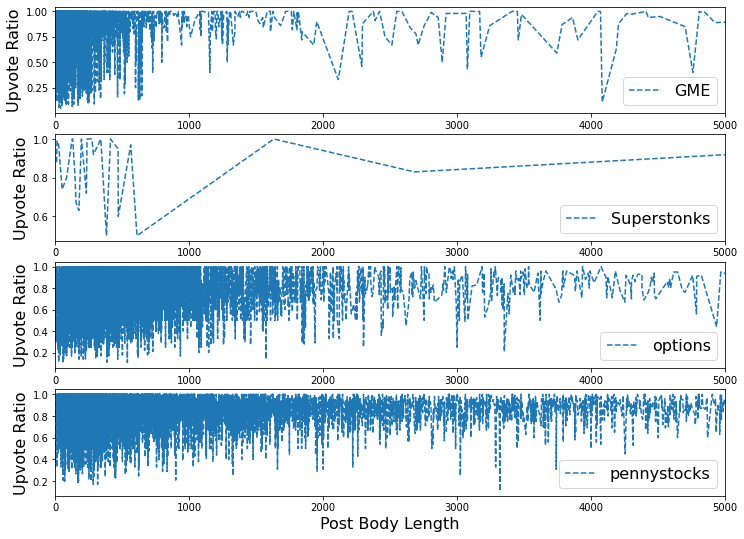

In [143]:
subs = ['GME', 'Superstonks', 'options', 'pennystocks']

df_sorted = df_with_body.sort_values(by='body_len', ascending=False)

fig, ax = plt.subplots(4,1, figsize=(12, 9))

for i, sub in enumerate(subs):
    df_sub = df_sorted[df_sorted.subreddit==sub]
    ax[i].plot(df_sub['body_len'], df_sub['upvote_ratio'],  ls='--', label=sub);
    ax[i].set_xlabel('Post Body Length', fontsize=16);
    ax[i].set_ylabel('Upvote Ratio', fontsize=16);
    ax[i].legend(fontsize=16)
    ax[i].set_xlim([0, 5000]);

In [144]:
from scipy.stats import binned_statistic

In [145]:
from scipy.stats import binned_statistic
bin_mean, bin_edge, _ = binned_statistic(df_sub['body_len'],
                                         df_sub['upvote_ratio'],
                                         statistic='mean',
                                         bins=50,
                                         range=(0,5000))


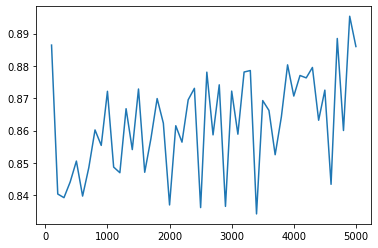

In [150]:
#bin_mean.shape, bin_edge.shape
plt.plot(bin_edge[1:], bin_mean)

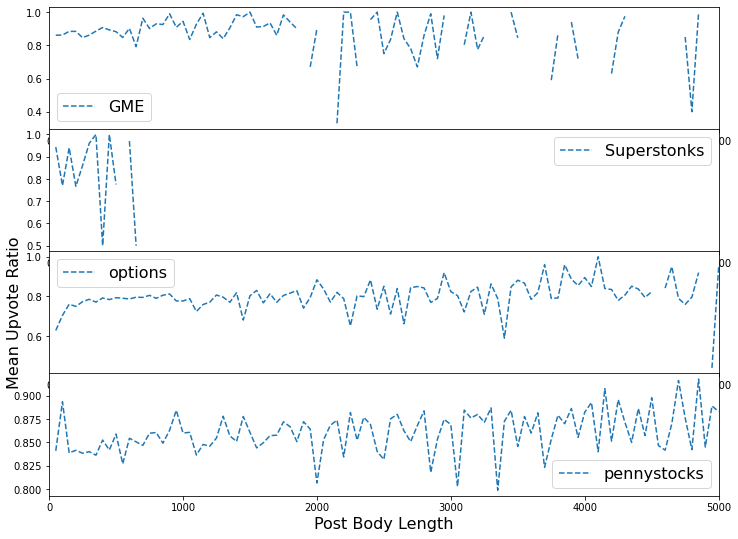

In [156]:
subs = ['GME', 'Superstonks', 'options', 'pennystocks']

df_sorted = df_with_body.sort_values(by='body_len', ascending=False)

fig, ax = plt.subplots(4,1, figsize=(12, 9))

for i, sub in enumerate(subs):
    df_sub = df_sorted[df_sorted.subreddit==sub]
    
    bin_mean, bin_edge, _ = binned_statistic(df_sub['body_len'],
                                         df_sub['upvote_ratio'],
                                         statistic='mean',
                                         bins=100,
                                         range=(0,5000))
    
    ax[i].plot(bin_edge[1:], bin_mean,  ls='--', label=sub);
    ax[i].set_xlabel('Post Body Length', fontsize=16);
    ax[i].legend(fontsize=16)
    ax[i].set_xlim([0, 5000]);
    plt.subplots_adjust(hspace=0)
ax[2].set_ylabel('Mean Upvote Ratio', fontsize=16);

In [ ]:
#sns.distplot(y_views_of_video_zoom)